In [1]:
# Importing Necessary Libraries

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras import models, layers

# Mounting Google Drive for Data

from google.colab import drive
drive.mount('/content/Drive')

Mounted at /content/Drive


In [2]:
# Setting Data Directories

train_dir = '/content/Drive/MyDrive/StartersSample/Train'
test_dir = '/content/Drive/MyDrive/StartersSample/Test'

# Getting the List of Categories

categories = sorted(os.listdir(train_dir))
num_classes = len(categories)
print('Number of Target Classes:', num_classes)
print(list(enumerate(categories)))

Number of Target Classes: 3
[(0, 'Bulbasaur'), (1, 'Charmander'), (2, 'Squirtle')]


In [3]:
# Creating Training and Testing Data

training_data = []
testing_data = []

count = 0

def create_training_data():
  for category in categories:
    global count
    path = os.path.join(train_dir, category)
    num_class = categories.index(category)
    for img in sorted(os.listdir(path)):
      img_array = cv2.imread(os.path.join(path, img))
      count = count + 1
      print("Images Currently Processed: ", count)
      rbg_img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
      resized_array = cv2.resize(rbg_img_array, (64,64))
      training_data.append([resized_array, num_class])

def create_testing_data():
  for category in categories:
    global count
    path = os.path.join(test_dir, category)
    num_class = categories.index(category)
    for img in sorted(os.listdir(path)):
      img_array = cv2.imread(os.path.join(path, img))
      count = count + 1
      print("Images Currently Processed: ", count)
      rbg_img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
      resized_array = cv2.resize(rbg_img_array, (64,64))
      testing_data.append([resized_array, num_class])

create_training_data()
create_testing_data()

Images Currently Processed:  1
Images Currently Processed:  2
Images Currently Processed:  3
Images Currently Processed:  4
Images Currently Processed:  5
Images Currently Processed:  6
Images Currently Processed:  7
Images Currently Processed:  8
Images Currently Processed:  9
Images Currently Processed:  10
Images Currently Processed:  11
Images Currently Processed:  12
Images Currently Processed:  13
Images Currently Processed:  14
Images Currently Processed:  15
Images Currently Processed:  16
Images Currently Processed:  17
Images Currently Processed:  18
Images Currently Processed:  19
Images Currently Processed:  20
Images Currently Processed:  21
Images Currently Processed:  22
Images Currently Processed:  23
Images Currently Processed:  24
Images Currently Processed:  25
Images Currently Processed:  26
Images Currently Processed:  27
Images Currently Processed:  28
Images Currently Processed:  29
Images Currently Processed:  30
Images Currently Processed:  31
Images Currently 

In [4]:
# Creating Training and Testing Numpy Arrays

x_train = []
y_train = []
x_test = []
y_test = []

for features, label in training_data:
  x_train.append(features)
  y_train.append(label)

for features, label in testing_data:
  x_test.append(features)
  y_test.append(label)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

print("Training Data Shape: ", x_train.shape)
print("Testing Data Shape: ", x_test.shape)
print("Training Label Shape: ", y_train.shape)
print("Testing Label Shape: ", y_test.shape)

Training Data Shape:  (108, 64, 64, 3)
Testing Data Shape:  (36, 64, 64, 3)
Training Label Shape:  (108,)
Testing Label Shape:  (36,)


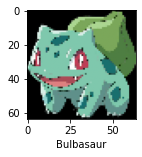

In [5]:
# Normalizing

x_train = x_train / 255
x_test = x_test / 255

# Plotting the first entry

def plot_sample(X, Y, index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(categories[Y[index]])

plot_sample(x_train, y_train, 0)

In [14]:
# Creating and Compiling CNN Model

cnn = models.Sequential([
                         # CNN Layers
                         layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', input_shape = (64,64,3)),
                         layers.MaxPooling2D((2,2)),
                         layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'),
                         layers.MaxPooling2D((2,2)),
                         layers.BatchNormalization(),
                         layers.Conv2D(filters = 128, kernel_size = (3,3), strides = (2,2), activation = 'relu'),
                         layers.MaxPooling2D((2,2)),
                         # Dense Layers
                         layers.Flatten(),
                         layers.Dropout(0.2),
                         layers.Dense(1024, activation = 'relu'),
                         layers.Dense(512, activation = 'relu'),
                         layers.Dense(num_classes, activation = 'softmax')
])

cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 128)       3584      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 128)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 128)       147584    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 batch_normalization_2 (Batc  (None, 14, 14, 128)      512       
 hNormalization)                                                 
                                                      

In [15]:
# Fitting the model with Training Data

cnn.fit(x_train, y_train, epochs = 20)

Epoch 1/20
4/4 [==============================] - 3s 594ms/step - loss: 1.9383 - accuracy: 0.3981
Epoch 2/20
4/4 [==============================] - 2s 581ms/step - loss: 0.3737 - accuracy: 0.8241
Epoch 3/20
4/4 [==============================] - 2s 573ms/step - loss: 0.1636 - accuracy: 0.9352
Epoch 4/20
4/4 [==============================] - 2s 577ms/step - loss: 0.0952 - accuracy: 0.9537
Epoch 5/20
4/4 [==============================] - 2s 587ms/step - loss: 0.0760 - accuracy: 0.9722
Epoch 6/20
4/4 [==============================] - 2s 578ms/step - loss: 0.0096 - accuracy: 1.0000
Epoch 7/20
4/4 [==============================] - 2s 582ms/step - loss: 0.0134 - accuracy: 1.0000
Epoch 8/20
4/4 [==============================] - 2s 576ms/step - loss: 0.0296 - accuracy: 0.9907
Epoch 9/20
4/4 [==============================] - 2s 576ms/step - loss: 0.0355 - accuracy: 0.9815
Epoch 10/20
4/4 [==============================] - 2s 579ms/step - loss: 0.0346 - accuracy: 0.9815
Epoch 11/20
4/4 [==

In [16]:
# Calculating Loss and Accuracy

(loss, accuracy) = cnn.evaluate(x_test, y_test)
print("Loss = ", loss)
print("Accuracy = ", accuracy)

2/2 [==============================] - 0s 29ms/step - loss: 0.2027 - accuracy: 0.9444
Loss =  0.2026762217283249
Accuracy =  0.9444444179534912


In [18]:
# Making Predictions

predictions = cnn.predict(x_test)
predictions = [np.argmax(element) for element in predictions]
predictions = np.array(predictions)

print("Predictions of First 5 Test Inputs: ", predictions[:5])
print("Actual Classes of First 5 Test Inputs: ", y_test[:5])

Predictions of First 5 Test Inputs:  [0 0 2 0 0]
Actual Classes of First 5 Test Inputs:  [0 0 0 0 0]


In [19]:
# Saving the Model for Offline Usage

cnn.save("Pokémon_Model.h5")